In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dm-data/sample_submission.csv
/kaggle/input/dm-data/train.csv
/kaggle/input/dm-data/test.csv


In [2]:
data = pd.read_csv('/kaggle/input/dm-data/train.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Id
0,1,85,66,29,0,26.6,0.351,31,0,1
1,1,89,66,23,94,28.1,0.167,21,0,3
2,5,116,74,0,0,25.6,0.201,30,0,5
3,10,115,0,0,0,35.3,0.134,29,0,7
4,2,197,70,45,543,30.5,0.158,53,1,8


In [9]:
data.drop('Id', axis=1, inplace=True)

In [10]:
features = ['Pregnancies', 'Glucose','BloodPressure','SkinThickness','BMI','DiabetesPedigreeFunction','Age']
X = data[features]
y = data.pop('Outcome')

In [27]:
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your DataFrame without 'Outcome' and 'Id' columns
scaler = StandardScaler()

# Scaling the features
scaled_features = scaler.fit_transform(X)

# Creating a new DataFrame with the scaled features
X = pd.DataFrame(scaled_features, columns=X.columns)


from sklearn.preprocessing import MinMaxScaler

# Assuming 'df' is your DataFrame without 'Outcome' and 'Id' columns
scaler = MinMaxScaler()

# Scaling the features
scaled_features = scaler.fit_transform(X)

# Creating a new DataFrame with the scaled features
X = pd.DataFrame(scaled_features, columns=X.columns)


In [28]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age
0,0.058824,0.431472,0.540984,0.460317,0.447811,0.116567,0.166667
1,0.058824,0.451777,0.540984,0.365079,0.473064,0.038002,0.000000
2,0.294118,0.588832,0.606557,0.000000,0.430976,0.052519,0.150000
3,0.588235,0.583756,0.000000,0.000000,0.594276,0.023911,0.133333
4,0.117647,1.000000,0.573770,0.714286,0.513468,0.034159,0.533333


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, shuffle=True)
X_test, X_valid, y_test, y_valid = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, shuffle=True)

In [14]:

from tensorflow import keras
from tensorflow.keras import layers

In [15]:
input_shape = [X_train.shape[1]]
model = keras.Sequential([
    layers.Dense(units=32, activation='relu', input_shape=input_shape),
    layers.Dense(units=32, activation='relu'),
    layers.Dense(units=32, activation='relu'),
    layers.Dense(units=1)
])
model.compile(
    optimizer='adam',
    loss='mae',
    metrics=['accuracy'],
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_valid),
    batch_size=512,
    epochs=200,
    verbose=0
)

history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Model Loss: {loss:.4f}")
print(f"Model Accuracy: {accuracy:.4f}")

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Minimum Validation Loss: 0.6530
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6165 - loss: 0.5770 
Model Loss: 0.6010
Model Accuracy: 0.6273


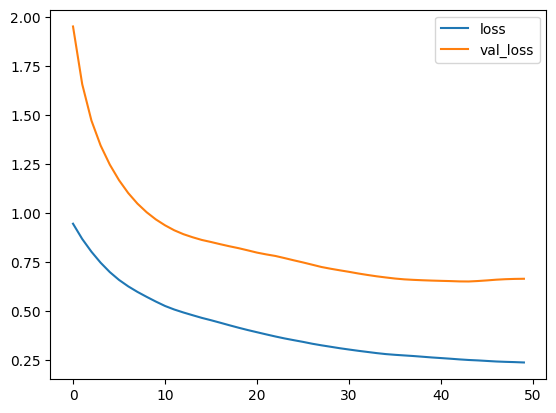

In [29]:
input_shape = [X_train.shape[1]]
model = keras.Sequential([
    layers.Dense(units=32, activation='relu', input_shape=input_shape),
    layers.BatchNormalization(),
    layers.Dense(units=32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(units=32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(units=1)
])
model.compile(
    optimizer='adam',
    loss='mae',
    metrics=['accuracy'],
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_valid),
    batch_size=512,
    epochs=50,
    verbose=0
)

history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Model Loss: {loss:.4f}")
print(f"Model Accuracy: {accuracy:.4f}")

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Minimum Validation Loss: 6.1350
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6612 - loss: 5.2346 
Model Loss: 4.6936
Model Accuracy: 0.7000


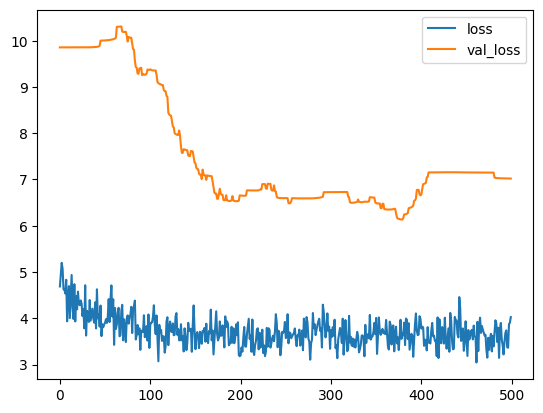

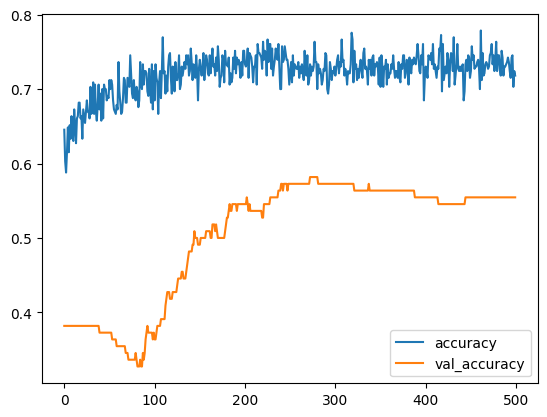

In [36]:
input_shape = [X_train.shape[1]]
model = keras.Sequential([
    layers.Dense(units=100, activation='relu', input_shape=input_shape),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(units=100, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(units=100, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(units=1)
])
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'],
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_valid),
    batch_size=512,
    epochs=500,
    verbose=0
)

history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Model Loss: {loss:.4f}")
print(f"Model Accuracy: {accuracy:.4f}")

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Minimum Validation Loss: 0.4790
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6732 - loss: 0.3983 
Model Loss: 0.3777
Model Accuracy: 0.7091


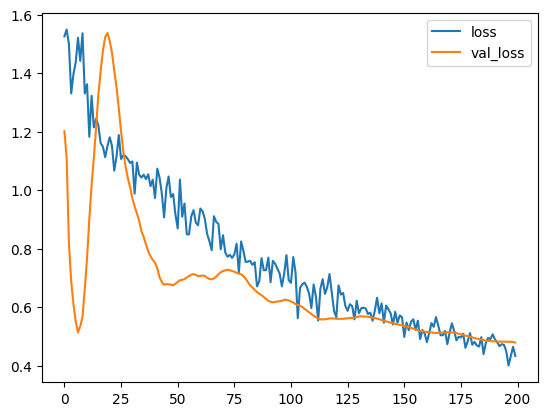

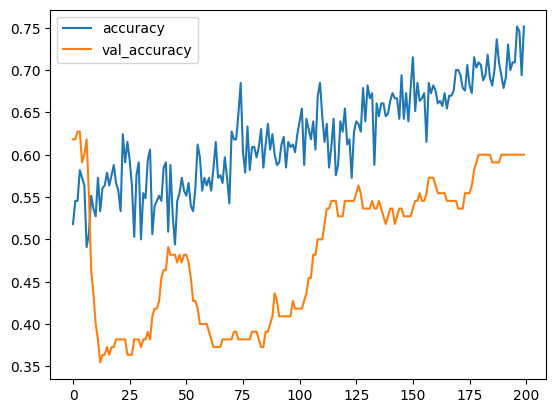

In [38]:
input_shape = [X_train.shape[1]]
model = keras.Sequential([
    layers.Dense(units=100, activation='relu', input_shape=input_shape),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(units=100, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(units=100, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(units=1)
])
model.compile(
    optimizer='adam',
    loss='mae',
    metrics=['accuracy'],
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_valid),
    batch_size=512,
    epochs=200,
    verbose=0
)

history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Model Loss: {loss:.4f}")
print(f"Model Accuracy: {accuracy:.4f}")

In [40]:
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor


In [47]:
y.head()

0    0
1    0
2    0
3    0
4    1
Name: Outcome, dtype: int64

In [46]:
# Define the model
my_model_2 = XGBRegressor(random_state=0, n_estimators=500, learning_rate=0.2) # Your code here

evals = [(X_train, 'train'), (X_test, 'eval')]
# Fit the model
my_model_2.fit(X_train, y_train, eval_set=evals, eval_metric='mae', verbose=True) # Your code here

# Get predictions
predictions_2 = my_model_2.predict(X_valid) # Your code here

# Calculate MAE
mae_2 = mean_absolute_error(y_valid, predictions_2) # Your code here



# Uncomment to print MAE
print("Mean Absolute Error:" , mae_2)

TypeError: ('Unsupported type for label', "<class 'str'>")